In [33]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt


In [34]:

def calculate_investments(file_path):
    # Load the data
    data = pd.read_csv(file_path)

    # Filter data for "ISRAEL ST"
    israel_st_investments = data[data.apply(lambda row: row.astype(str).str.contains("ISRAEL ST").any(), axis=1)]

    # Compute total investment for "ISRAEL ST"
    total_israel_st = israel_st_investments['Base Market Value'].replace('[\$,]', '', regex=True).astype(float).sum()

    # Compute total investments in the entire dataset
    total_investments = data['Base Market Value'].replace('[\$,]', '', regex=True).astype(float).sum()

    # Calculate the proportion of "ISRAEL ST" investments
    proportion_israel_st = total_israel_st / total_investments if total_investments else 0

    return total_israel_st, proportion_israel_st

# Paths to the files
file_path_1 = "../data/input/Copy of BNY Mellon GASB Holdings.csv"
file_path_2 = "../data/input/Copy of BNY Mellon LEQTF Holdings.csv"

# Calculate investments for each file
investments_1 = calculate_investments(file_path_1)
investments_2 = calculate_investments(file_path_2)

print(f'File 1 - Total Investment: ${investments_1[0]:,.2f}, Proportion: {investments_1[1]*100:.2f}%')
print(f'File 2 - Total Investment: ${investments_2[0]:,.2f}, Proportion: {investments_2[1]*100:.2f}%')

File 1 - Total Investment: $14,824,070.00, Proportion: 0.92%
File 2 - Total Investment: $14,824,155.00, Proportion: 0.92%


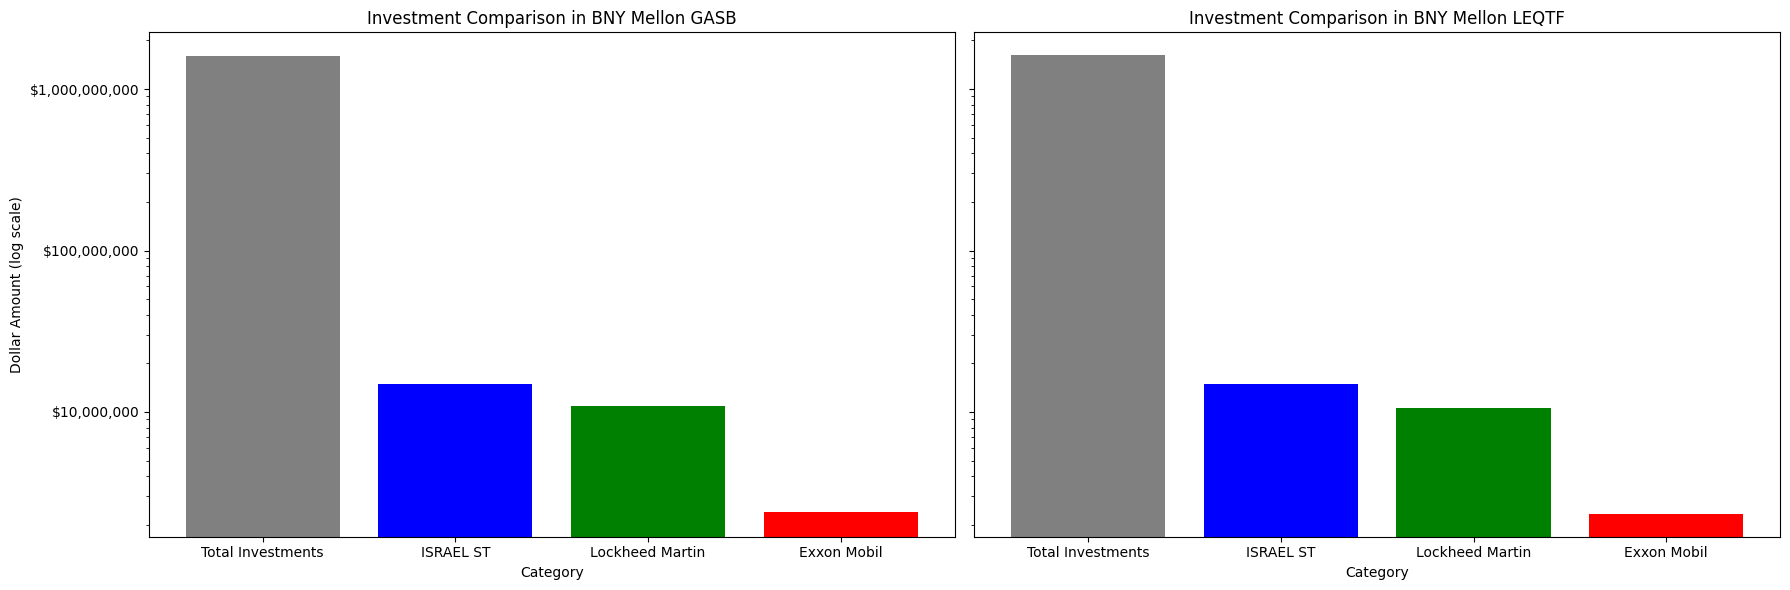

In [35]:
def calculate_investments(data, keyword):
    specific_investments = data[data.apply(lambda row: row.astype(str).str.contains(keyword, case=False).any(), axis=1)]
    total_specific = specific_investments['Base Market Value'].replace('[\$,]', '', regex=True).astype(float).sum()
    return total_specific

def generate_graphs(file_path_gasb, file_path_leqtf):
    # Load the data
    data_gasb = pd.read_csv(file_path_gasb)
    data_leqtf = pd.read_csv(file_path_leqtf)

    # Total investments in each dataset
    total_investments_gasb = data_gasb['Base Market Value'].replace('[\$,]', '', regex=True).astype(float).sum()
    total_investments_leqtf = data_leqtf['Base Market Value'].replace('[\$,]', '', regex=True).astype(float).sum()

    # Calculate specific investments
    israel_st_gasb = calculate_investments(data_gasb, "ISRAEL ST")
    lockheed_gasb = calculate_investments(data_gasb, "Lockheed Martin Corp")
    exxon_gasb = calculate_investments(data_gasb, "Exxon Mobil Corp")

    israel_st_leqtf = calculate_investments(data_leqtf, "ISRAEL ST")
    lockheed_leqtf = calculate_investments(data_leqtf, "Lockheed Martin Corp")
    exxon_leqtf = calculate_investments(data_leqtf, "Exxon Mobil Corp")

    # Data for the graphs
    categories = ['Total Investments', 'ISRAEL ST', 'Lockheed Martin', 'Exxon Mobil']
    values_gasb = [total_investments_gasb, israel_st_gasb, lockheed_gasb, exxon_gasb]
    values_leqtf = [total_investments_leqtf, israel_st_leqtf, lockheed_leqtf, exxon_leqtf]

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

    # Setup for readable y-axis labels
    formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))
    
    # Graph for BNY Mellon GASB
    ax1.bar(categories, values_gasb, color=['grey', 'blue', 'green', 'red'])
    ax1.set_title('Investment Comparison in BNY Mellon GASB')
    ax1.set_ylabel('Dollar Amount (log scale)')
    ax1.set_xlabel('Category')
    ax1.set_yscale('log')
    ax1.yaxis.set_major_formatter(formatter)  # Set the custom formatter

    # Graph for BNY Mellon LEQTF
    ax2.bar(categories, values_leqtf, color=['grey', 'blue', 'green', 'red'])
    ax2.set_title('Investment Comparison in BNY Mellon LEQTF')
    ax2.set_xlabel('Category')
    ax2.set_yscale('log')
    ax2.yaxis.set_major_formatter(formatter)  # Set the custom formatter

    # Display the graphs
    plt.tight_layout()
    plt.show()

# File paths (adjust as necessary)
file_path_gasb = "../data/input/Copy of BNY Mellon GASB Holdings.csv"
file_path_leqtf = "../data/input/Copy of BNY Mellon LEQTF Holdings.csv"

generate_graphs(file_path_gasb, file_path_leqtf)


In [36]:

def count_unique_companies(file_path):
    data = pd.read_csv(file_path)
    
    unique_companies = data['Security Description1'].nunique()
    return unique_companies

unique_companies_gasb = count_unique_companies(file_path_gasb)
unique_companies_leqtf = count_unique_companies(file_path_leqtf)

print(f'Number of unique companies in GASB dataset: {unique_companies_gasb}')
print(f'Number of unique companies in LEQTF dataset: {unique_companies_leqtf}')

Number of unique companies in GASB dataset: 66
Number of unique companies in LEQTF dataset: 70
